# Hypothesis 2

### Building on the previous hypothesis involving 12 medium type emergency unit buildings distributed across the city, let us consider the costs of establishing and maintaining each type of building as follows (in terms of a fictional unit of money SPY):

### Let us consider the cost of each team to be 600 SPY

#### Small Emergency Unit - 3000 SPY (base cost of small unit building assumed to be 1200. Total = 1200 + 3X600 = 3000 SPY)
#### Medium Emergency Unit - 4500 SPY (base cost of medium unit building assumed to be 300 greater than that of small unit building - 1500. Total = 1500 + 5X600 = 4500 SPY)
#### Large Emergency Unit - 6000 SPY (base cost of large unit building assumed to be 300 greater than that of medium unit building - 1800. Total = 1800 + 7X600 = 6000 SPY)

### 12 medium type buildings lead to a cost of 54,000 SPY. So, let us analyze how a budget of 54,000 SPY units of money provided to the city planner can be optimally allocated across the small, medium and large types of buildings, to minimize the average response time and maximize the average percentage of successfully responded emergencies.

### Building on the conclusions from Hypothesis 1, when positioning the emergency units in Hypothesis 2, it is ensured that the emergency units are distributed evenly across the coordinates in the inner portion of the city, with no units located in the corners.

### Case 1: Considering greater number of small unit buildings than medium unit buildings, which are greater than the number of large unit buildings: 8 small (24,000 SPY), 4 medium (18,000 SPY) and 2 large (12,000 SPY). These buildings are distributed evenly across the city.
### Case 2: Considering greater number of larger unit buildings than medium unit buildings, which are greater than the number of small unit buildings: 1 small (3,000 SPY), 3 medium (13,500 SPY) and 6 large (36,000 SPY). These buildings are distributed evenly across the city.
### Prediction: Since Case 1 would involve greater number of buildings distributed across the city, teams from the unit buildings can reach the emergency locations faster when compared to Case 2. So, we hypothesis that Case 1 would provide more optimal results than Case 2.

In [1]:
import main
import pandas as pd
import networkx as nx
from EmergencyUnit import EmergencyUnit
import matplotlib.pyplot as plt

In [2]:
def visualize(city):
    units = EmergencyUnit.response_buildings
    small_unit_locs = [unit.location for unit in units if unit.available_capacity==3]
    medium_unit_locs = [unit.location for unit in units if unit.available_capacity==5]
    large_unit_locs = [unit.location for unit in units if unit.available_capacity==7]

    # small_emergency_unit_labels = dict()
    # medium_emergency_unit_labels = dict()
    # large_emergency_unit_labels = dict()
    color_map = dict()
    size_map = dict()
    pos=dict()
    node_coordinates=list(city.city_graph.nodes)
    height = city.height
    dim = city.zone_dimension
    for i in range(len(node_coordinates)):
        pos[node_coordinates[i]]=(node_coordinates[i][1], (height*dim-1)-node_coordinates[i][0])
        if node_coordinates[i] in small_unit_locs:
            color_map[node_coordinates[i]] = 'red'
            size_map[node_coordinates[i]] = 250
        elif node_coordinates[i] in medium_unit_locs:
            color_map[node_coordinates[i]] = 'blue'
            size_map[node_coordinates[i]] = 400
        elif node_coordinates[i] in large_unit_locs:
            color_map[node_coordinates[i]] = 'green'
            size_map[node_coordinates[i]] = 650
        else:
            color_map[node_coordinates[i]] = 'black'
            size_map[node_coordinates[i]] = 150
    colors = [ color_map.get(node) for node in city.city_graph.nodes]
    sizes = [ size_map.get(node) for node in city.city_graph.nodes]
    traffic_time_labels = nx.get_edge_attributes(city.city_graph,'adjusted_time')
    plt.figure(1, figsize=(9,9))
    nx.draw(city.city_graph, pos, node_size=sizes, node_color = colors)
    a=nx.draw_networkx_edge_labels(city.city_graph,pos,edge_labels=traffic_time_labels, font_size=10)
    # nx.draw_networkx_labels(city.city_graph, pos, small_emergency_unit_labels, font_size=12, font_color='g')
    # nx.draw_networkx_labels(city.city_graph, pos, medium_emergency_unit_labels, font_size=12, font_color='g')
    # nx.draw_networkx_labels(city.city_graph, pos, large_emergency_unit_labels, font_size=12, font_color='g')
    plt.show()

In [3]:
def plot_graph(resp_times, successful_perc, resptime_file, perc_successful_file):
    df1 = pd.DataFrame({'Average Response Time': resp_times}, index = [_ for _ in range(1, 101)])
    plot1 = df1.plot(title = 'Covergence of Average Response Time of Emergencies')
    plot1.set(xlabel='Number of Simulation Runs', ylabel='Average Response Time (mins)')
    # plot1.show()
    df1.to_csv('results/'+resptime_file)
    df2 = pd.DataFrame({'Percentage of Successfully Responded Emergencies': successful_perc}, 
                       index = [_ for _ in range(1, 101)])
    plot2 = df2.plot(title = 'Covergence of Percentage of Successfully Responded Emergencies')
    plot2.set(xlabel='Number of Simulation Runs', ylabel='Average Percentage of Successfully Responded Emergencies')
    # plot2.show()
    df2.to_csv('results/'+perc_successful_file)
    print("Average Response Time: {} mins".format(round(resp_times[-1], 2)))
    print("Average Percentage of Successfully Responded Emergencies: {} %".format(round(successful_perc[-1], 2)))

# Case 1 - # of Small > # of Medium > # of Large 

In [4]:
city = main.configure_city_file('configuration_hyp2_sml.txt')

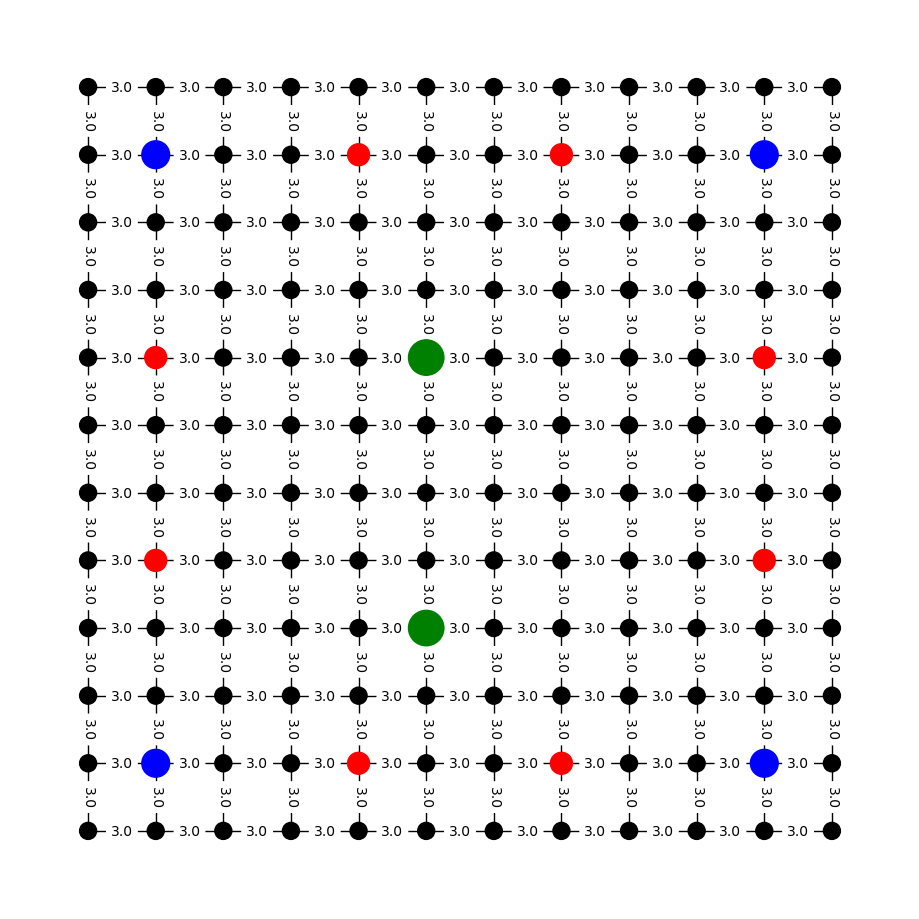

In [5]:
visualize(city)

In [6]:
resp_times, successful_perc, num_emergencies, emergency_dict = main.simulate(city)

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [41:27<00:00, 24.87s/it]


Average Response Time: 6.62 mins
Average Percentage of Successfully Responded Emergencies: 88.83 %


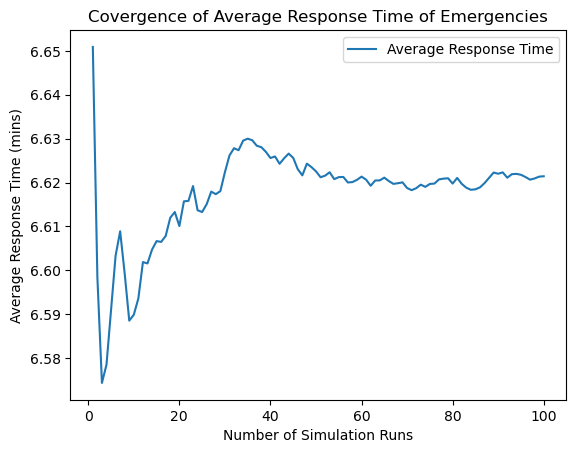

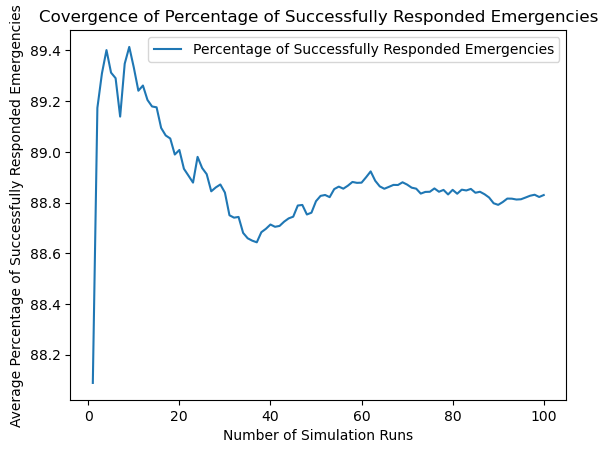

In [7]:
plot_graph(resp_times, successful_perc, 'hypothesis2_sml_resptime.csv', 'hypothesis2_sml_percsuccessful.csv')

# Case 2 - # of Large > # of Medium > # of Small


In [8]:
city = main.configure_city_file('configuration_hyp2_lms.txt')

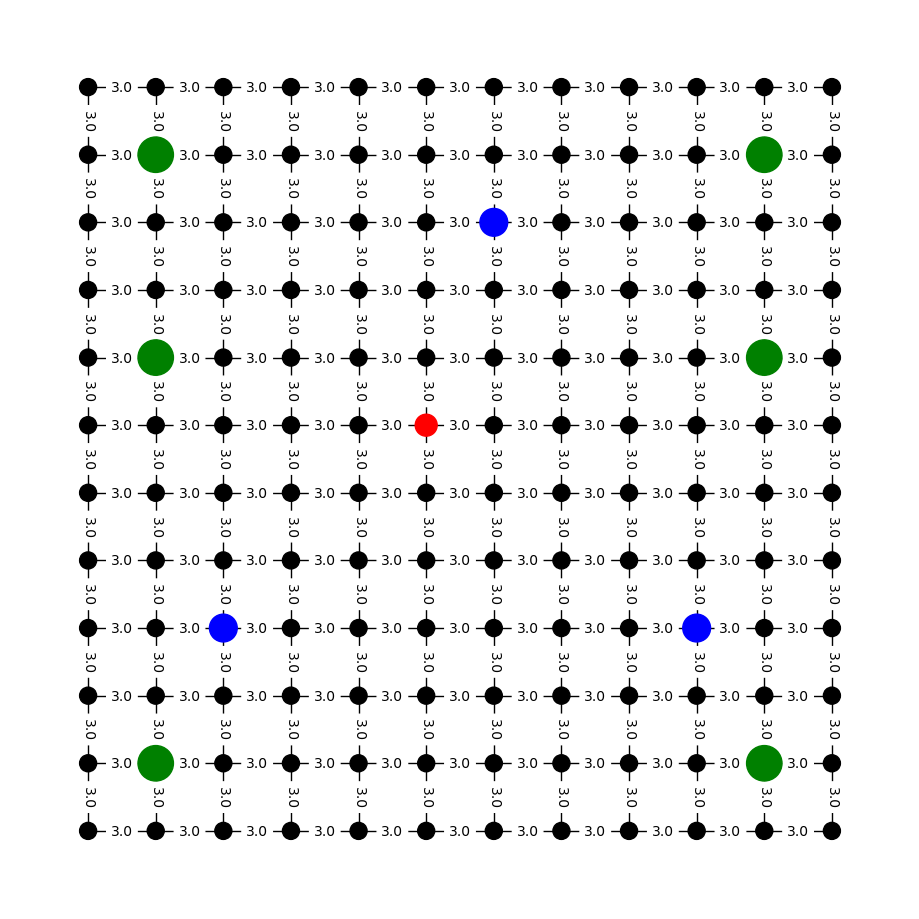

In [9]:
visualize(city)

In [10]:
resp_times, successful_perc, num_emergencies, emergency_dict = main.simulate(city)

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [18:53<00:00, 11.34s/it]


Average Response Time: 7.46 mins
Average Percentage of Successfully Responded Emergencies: 75.46 %


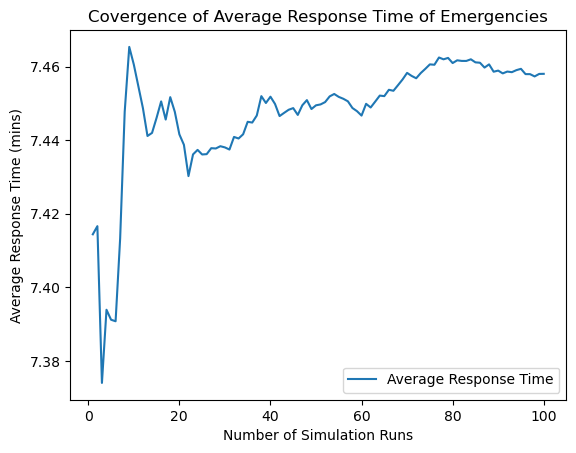

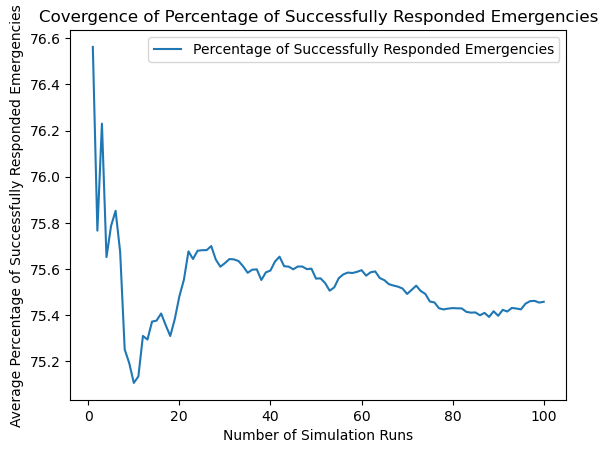

In [11]:
plot_graph(resp_times, successful_perc, 'hypothesis2_lms_resptime.csv', 'hypothesis2_lms_percsuccessful.csv')

# Conclusion

### Therefore, allocating the available budget into creation of a greater number of smaller emergency unit buildings than medium units, and the least number of large unit buildings, which are distributed approximately evenly through the city, will optimize the average response time and the average percentage of successfully responded emergencies.